In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn tensorflow


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached tensorflow-2.19.0-cp310-cp310-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.4-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached termcolor-3.0.1-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.2-cp310-cp310-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.71.0-cp310-cp310-win_amd64.whl.metadata (4.0 kB)
  Using cached t

In [2]:
import pandas as pd

df = pd.read_csv("emotions.csv")
print(df.head())
print(df['label'].value_counts())


   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  ff

In [ ]:
df.rows()

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# 1. Load the dataset
df = pd.read_csv("/content/emotions.csv")  # Replace with your dataset name

# 2. Preprocess data
X = df.drop('label', axis=1)  # EEG features
y = df['label']              # Emotion labels

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encoding for neural network
y_categorical = to_categorical(y_encoded)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

# 4. Model 1 - Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)

# 5. Model 2 - Support Vector Machine
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_acc)

# 6. Model 3 - Neural Network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_nn.shape[1],)),
    # Dropout(0.3),
    Dense(64, activation='relu'),
    # Dropout(0.2),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_nn, y_train_nn, epochs=30, batch_size=32, validation_split=0.1)

nn_loss, nn_acc = model.evaluate(X_test_nn, y_test_nn)
print("Neural Network Accuracy:", nn_acc)


Random Forest Accuracy: 0.9882903981264637
SVM Accuracy: 0.9578454332552693
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8186 - loss: 0.5483 - val_accuracy: 0.9415 - val_loss: 0.2029
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9631 - loss: 0.1229 - val_accuracy: 0.9474 - val_loss: 0.1001
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9822 - loss: 0.0613 - val_accuracy: 0.9532 - val_loss: 0.1128
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9870 - loss: 0.0357 - val_accuracy: 0.9591 - val_loss: 0.0980
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9982 - loss: 0.0111 - val_accuracy: 0.9532 - val_loss: 0.1080
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 0.9532 - val_loss: 0.0950
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9474 - val_loss: 0.0937
Epoch 8/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9474 - val_loss: 0.0944
Ep

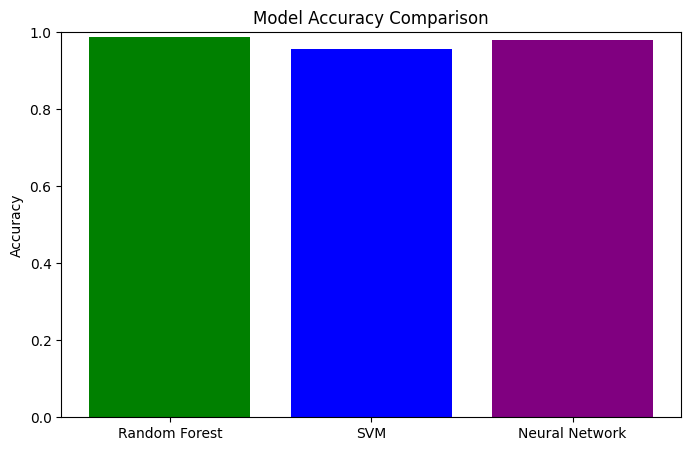

In [ ]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'SVM', 'Neural Network']
accuracies = [rf_acc, svm_acc, nn_acc]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['green', 'blue', 'purple'])
plt.ylim([0, 1])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
# Example: Predict using Random Forest
new_sample = np.array([X_scaled[0]])  # Replace with actual EEG data sample
predicted_label = le.inverse_transform(rf.predict(new_sample))
print("Predicted Emotion (RF):", predicted_label[0])


Predicted Emotion (RF): NEGATIVE


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}
grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=3)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best accuracy:", grid.best_score_)


Best parameters: {'max_depth': 20, 'n_estimators': 200}
Best accuracy: 0.9841662747427741


Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.97      0.99      0.98       143
     NEUTRAL       1.00      1.00      1.00       148
    POSITIVE       0.99      0.97      0.98       136

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427



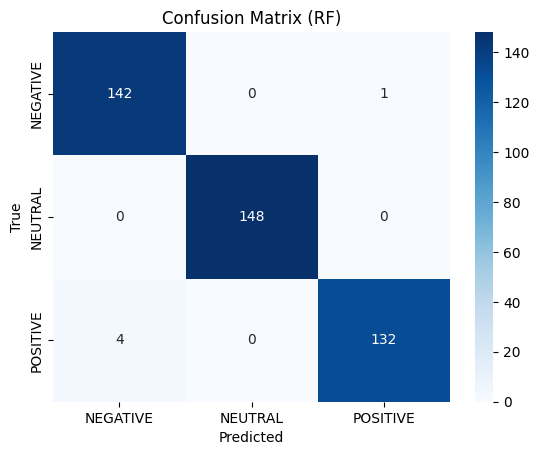

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Random Forest Example
print("Classification Report:\n", classification_report(y_test, rf_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (RF)")
plt.show()


In [ ]:
import joblib
joblib.dump(rf, 'random_forest_eeg.pkl')  # Save Random Forest
joblib.dump(scaler, 'scaler.pkl')         # Save scaler


['scaler.pkl']

In [ ]:
model.save('eeg_emotion_nn.h5')  # Save the neural network
